In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df_galpha = pd.read_csv('GIANA_Alpha.csv')
df_gbeta = pd.read_csv('GIANA_Beta.csv')
df_gboth = pd.read_csv('GIANA_both.csv')
df_talpha = pd.read_csv('TcrDist_Alpha.csv')
df_tbeta = pd.read_csv('TcrDist_Beta.csv')
df_tboth = pd.read_csv('TcrDist_both.csv')

In [3]:
df_galpha['Encoded/Chain'] = 'Alpha - GIANA'
df_gbeta['Encoded/Chain'] = 'Beta - GIANA'
df_gboth['Encoded/Chain'] = 'Both - GIANA'
df_talpha['Encoded/Chain'] = 'Alpha - tcrDist'
df_tbeta['Encoded/Chain'] = 'Beta - tcrDist'
df_tboth['Encoded/Chain'] = 'Paired - tcrDist'

In [4]:
df_tlist = [df_talpha,df_tbeta,df_tboth]
for df in df_tlist:
    df.rename(columns = {'epitope' : 'antigen.epitope'}, inplace = True)

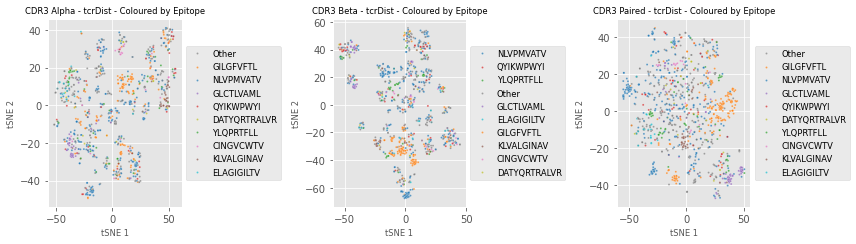

In [6]:
df_list = [df_talpha, df_tbeta, df_tboth]

fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))
top_9_epitopes = [
    "NLVPMVATV",
    "GILGFVFTL",
    "YLQPRTFLL",
    "QYIKWPWYI",
    "GLCTLVAML",
    "KLVALGINAV",
    "CINGVCWTV",
    "DATYQRTRALVR",
    "ELAGIGILTV"
]
# Iterate over DataFrames and axes
for i, (df, ax) in enumerate(zip(df_list, axes)):
    
    #top_9_epitopes = df['antigen.epitope'].value_counts().nlargest(9).index
    # Define a custom palette with unique colors for the top 9 epitopes using all colors from tab10 except the 8th
    palette = sns.color_palette("tab10", len(top_9_epitopes) + 1)[:7] + sns.color_palette("tab10", len(top_9_epitopes) + 1)[8:]
    # Add the 8th color for "Other" epitopes
    other_color = sns.color_palette("tab10")[7]
    # Create a dictionary to map top 9 epitopes to their corresponding colors
    epitope_color_map = {epitope: color for epitope, color in zip(top_9_epitopes, palette)}

    # Map all other epitopes to the 8th color
    other_color_map = {epitope: other_color for epitope in set(df['antigen.epitope']) - set(top_9_epitopes)}
    # Combine the color maps
    combined_color_map = {**epitope_color_map, **other_color_map}
    

    sns.scatterplot(data=df, x='tsne_1', y='tsne_2', s=4, alpha=0.7, hue='antigen.epitope', palette=combined_color_map, legend='full', ax=ax)
    
    ax.set_title(f"CDR3 {df['Encoded/Chain'].unique()[0]} - Coloured by Epitope", fontsize = 'small')
    ax.set_xlabel('tSNE 1', fontsize= 'small')
    ax.set_ylabel('tSNE 2', fontsize = 'small')
    
    # Create a custom legend for each subplot
    handles, labels = ax.get_legend_handles_labels()
    # Replace the individual epitope labels with "Other" for all other epitopes
    labels = ['Other' if label not in top_9_epitopes else label for label in labels]
    # Create a legend with modified labels
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        if label == 'Other' and label in unique_labels:
            continue
        unique_labels.append(label)
        unique_handles.append(handle)
    ax.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize= 'small')  # Adjust legend position
    
        
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('embeddings_hzsmall2.png', dpi =1000, facecolor = 'white', bbox_inches = 'tight')